In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="ticks")


In [16]:
def read_water_gage_station(filename):
    df = pd.read_csv(
        filename,
        index_col="t",
        usecols=lambda column: column not in ["s", "f_x", "g", "f_y", "direction"],
    )
    return df


In [17]:
WaterGageStation8771972 = read_water_gage_station("WaterGageStation8771972.csv")
WaterGageStation8772440 = read_water_gage_station("WaterGageStation8772440.csv")
WaterGageStation8772447 = read_water_gage_station("WaterGageStation8772447.csv")
WaterGageStation8772471 = read_water_gage_station("WaterGageStation8772471.csv")
WaterGageStation8773767 = read_water_gage_station("WaterGageStation8773767.csv")


In [18]:
datasets = {
    "Station 8771972": WaterGageStation8771972,
    "Station 8772440": WaterGageStation8772440,
    "Station 8772447": WaterGageStation8772447,
    "Station 8772471": WaterGageStation8772471,
    "Station 8773767": WaterGageStation8773767,
}


In [19]:
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]


In [20]:
for dataset_name, df in datasets.items():
    rename_columns = {
        "water_level": "Water Level (m)",
        "wind_speed": "Wind Speed (m/s)",
        "wind_direction": "Wind Direction (degrees)",
    }
    df.rename(columns=rename_columns, inplace=True)
    for col in rename_columns.values():
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df.index = pd.to_datetime(df.index)
    df.insert(0, "Year", df.index.year)
    df.insert(1, "Month", df.index.month)
    df["Month"] = df["Month"].map(month_map)
    df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)
    df["Year"] = pd.Categorical(df["Year"])

    datasets[dataset_name] = df


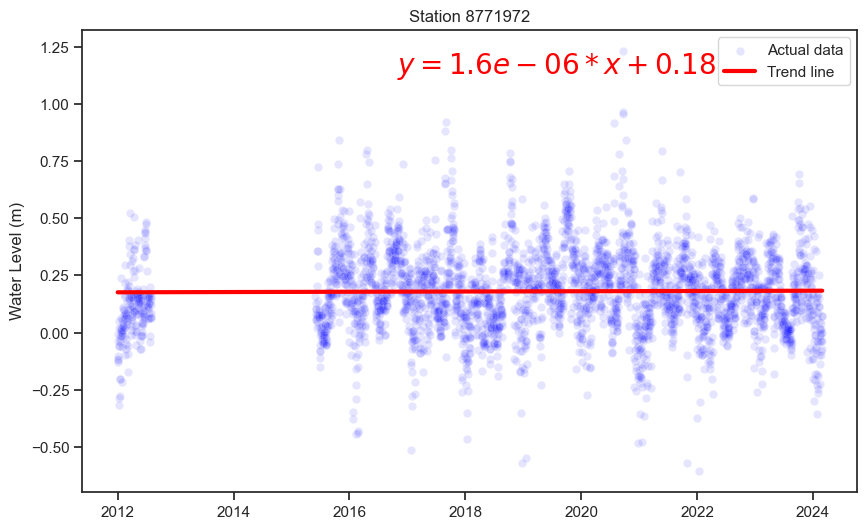

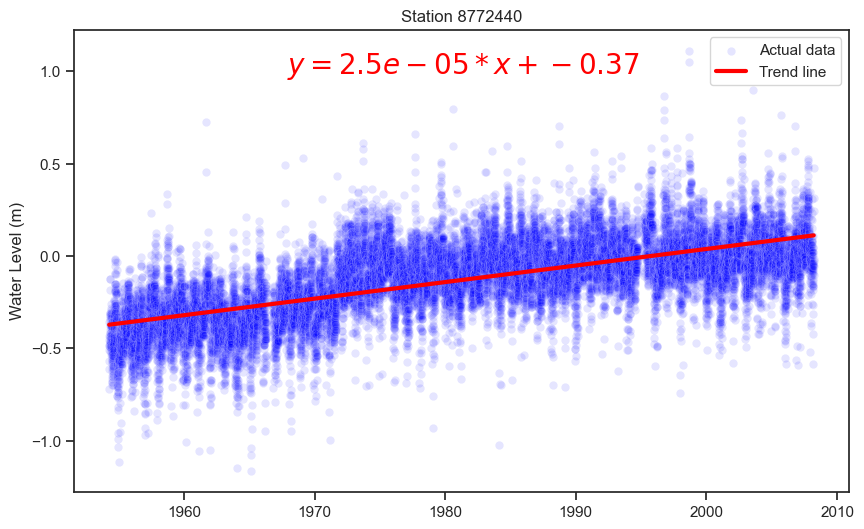

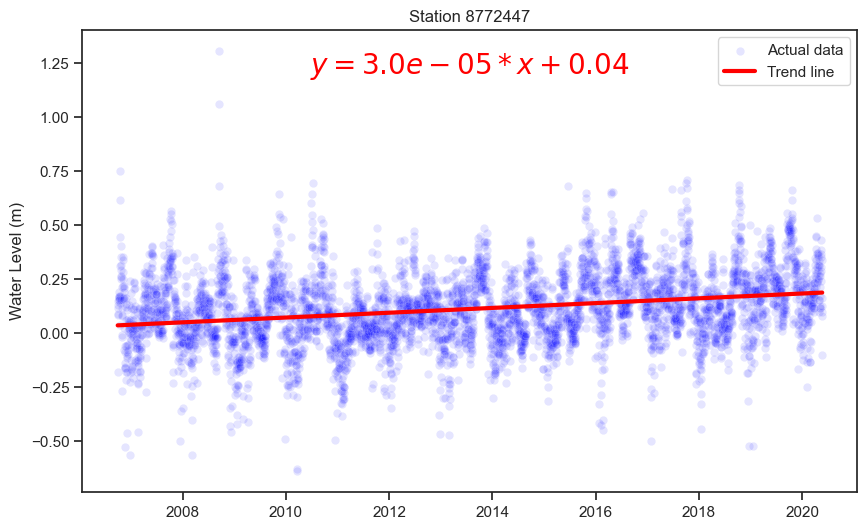

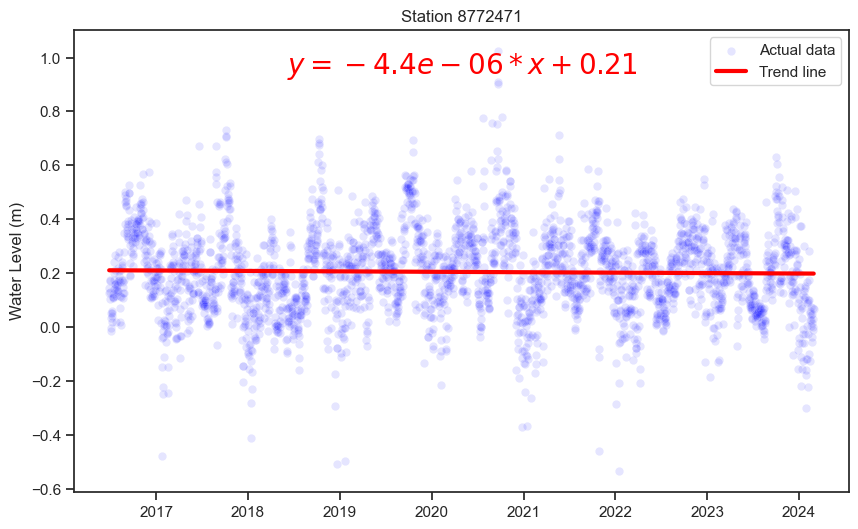

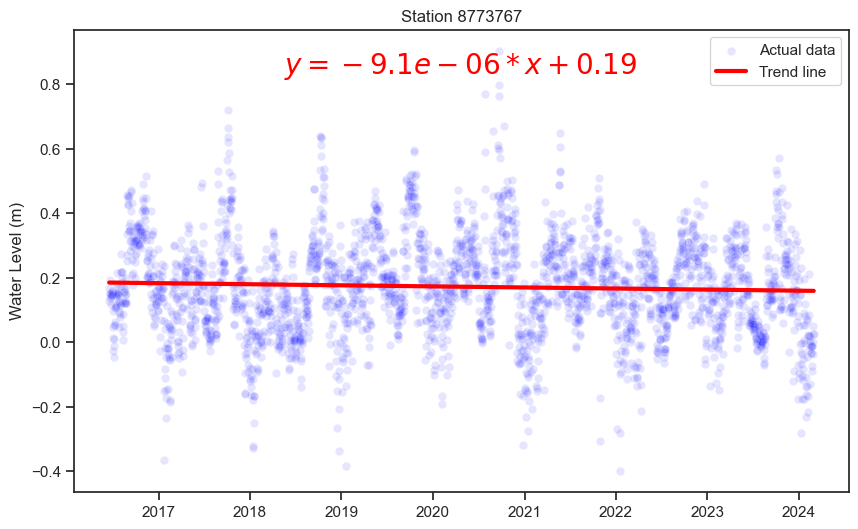

In [21]:
def plot_water_level_trend(df, title):
    df_daily = df[["Water Level (m)"]].resample("D").mean()
    df_daily.dropna(inplace=True)

    X = np.array((df_daily.index - df_daily.index[0]).days).reshape(-1, 1)
    y = df_daily["Water Level (m)"].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=df_daily.index,
        y="Water Level (m)",
        data=df_daily,
        color="blue",
        label="Actual data",
        alpha=0.1,
    )
    plt.plot(df_daily.index, y_pred, color="red", label="Trend line", linewidth=3)

    slope = model.coef_[0]
    intercept = model.intercept_

    plt.text(
        df_daily.index[int(len(df_daily) / 2)],
        y.max(),
        r"$y = {:.1e} * x + {:.2f}$".format(slope, intercept),
        fontsize=20,
        color="red",
        horizontalalignment="center",
        verticalalignment="top",
    )

    plt.xlabel("")
    plt.ylabel("Water Level (m)")
    plt.title(title)
    plt.legend()
    basePath = "Results/Plots/waterLevelTrend/"
    filename = f"{basePath}{title.replace(' ', '_')}.png"
    plt.savefig(filename, format="png")
    plt.show()

    r_squared = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return slope, intercept, r_squared, mse


for dataset_name, df in datasets.items():
    plot_water_level_trend(df, dataset_name)
